In [263]:
#Importation des Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [264]:
#Création d'une Dataframe
dataBase = {
    "AGE": ['20', '30', '23','26', '56', '35','20', '30', '23','26', '56', '35'], 
    "GENDER": ["Man", 'Woman', 'Woman',"Man", 'Woman', 'Woman',"Man", 'Woman', 'Woman',"Man", 'Woman', 'Woman'], 
    "POSITION": ["Paris", 'Lille', 'Marseille',"Nice", 'Lille', 'Marseille',"Paris", 'Lille', 'Marseille',"Nice", 'Lille', 'Marseille'], 
    "SPORT1": ["Foot", 'Tennis', 'Boxe',"Foot", 'Tennis', 'Boxe',"Foot", 'Tennis', 'Boxe',"Foot", 'Tennis', 'Boxe'],
    "SPORT2": ["Basket", 'Foot', 'Boxe',"Mma", 'Foot', 'Basket',"Basket", 'Foot', 'Boxe',"Mma", 'Foot', 'Basket'],
    "SPORT3": ["Ping-Pong", 'Mma', 'Escrime',"Foot", 'Tennis', 'Boxe',"Ping-Pong", 'Mma', 'Escrime',"Foot", 'Tennis', 'Boxe']
}

df = pd.DataFrame(dataBase)
df

,AGE,GENDER,POSITION,SPORT1,SPORT2,SPORT3
0,20,Man,Paris,Foot,Basket,Ping-Pong
1,30,Woman,Lille,Tennis,Foot,Mma
2,23,Woman,Marseille,Boxe,Boxe,Escrime
3,26,Man,Nice,Foot,Mma,Foot
4,56,Woman,Lille,Tennis,Foot,Tennis
5,35,Woman,Marseille,Boxe,Basket,Boxe
6,20,Man,Paris,Foot,Basket,Ping-Pong
7,30,Woman,Lille,Tennis,Foot,Mma
8,23,Woman,Marseille,Boxe,Boxe,Escrime
9,26,Man,Nice,Foot,Mma,Foot


In [265]:
# Levenshtein Distance
# Reference: https://leetcode.com/problems/edit-distance/discuss/159295/Python-solutions-and-intuition
# GitHub : https://github.com/Dylanlee777/5-Min-Machine-Learning/blob/master/6%20LevenshteinDistance.ipynb

def LevenshteinD(word1, word2):
    """Dynamic programming solution"""
    m = len(word1)
    n = len(word2)
    table = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        table[i][0] = i
    for j in range(n + 1):
        table[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                table[i][j] = table[i - 1][j - 1]
            else:
                table[i][j] = 1 + min(table[i - 1][j], table[i][j - 1], table[i - 1][j - 1])
                
    return table[-1][-1]

## <center>Application de la distance de Levenshtein</center>

In [266]:
for i in range(12):
    df.loc[i,'GENDER'] = LevenshteinD("Woman",str(df.loc[i,'GENDER']))#Permet de modifier les ligne de la dataframe sur la colonne POSITION
    df.loc[i,'POSITION'] = LevenshteinD("Paris",str(df.loc[i,'POSITION']))
    df.loc[i,'SPORT1'] = LevenshteinD("Foot",str(df.loc[i,'SPORT1']))
    df.loc[i,'SPORT2'] = LevenshteinD("Foot",str(df.loc[i,'SPORT2']))
    df.loc[i,'SPORT3'] = LevenshteinD("Foot",str(df.loc[i,'SPORT3']))
df

,AGE,GENDER,POSITION,SPORT1,SPORT2,SPORT3
0,20,3,0,0,5,8
1,30,0,5,6,0,4
2,23,0,6,3,3,7
3,26,3,5,0,4,0
4,56,0,5,6,0,6
5,35,0,6,3,5,3
6,20,3,0,0,5,8
7,30,0,5,6,0,4
8,23,0,6,3,3,7
9,26,3,5,0,4,0


## <center>Normalisation des data</center>

In [267]:
#On normalise les données entre -1 et 1
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[-0.98058068,  1.41421356, -2.18282063, -1.22474487,  1.02454353,
         1.24034735],
       [-0.14008295, -0.70710678,  0.24253563,  1.22474487, -1.33978769,
        -0.24806947],
       [-0.72843136, -0.70710678,  0.72760688,  0.        ,  0.07881104,
         0.86824314],
       [-0.47628204,  1.41421356,  0.24253563, -1.22474487,  0.55167728,
        -1.73648628],
       [ 2.04521112, -0.70710678,  0.24253563,  1.22474487, -1.33978769,
         0.49613894],
       [ 0.28016591, -0.70710678,  0.72760688,  0.        ,  1.02454353,
        -0.62017367],
       [-0.98058068,  1.41421356, -2.18282063, -1.22474487,  1.02454353,
         1.24034735],
       [-0.14008295, -0.70710678,  0.24253563,  1.22474487, -1.33978769,
        -0.24806947],
       [-0.72843136, -0.70710678,  0.72760688,  0.        ,  0.07881104,
         0.86824314],
       [-0.47628204,  1.41421356,  0.24253563, -1.22474487,  0.55167728,
        -1.73648628],
       [ 2.04521112, -0.70710678,  0.24253563,  1.

In [268]:
scdfa=StandardScaler()
dfa_std=scdfa.fit_transform(df.astype(float))
dfa_std

array([[-0.98058068,  1.41421356, -2.18282063, -1.22474487,  1.02454353,
         1.24034735],
       [-0.14008295, -0.70710678,  0.24253563,  1.22474487, -1.33978769,
        -0.24806947],
       [-0.72843136, -0.70710678,  0.72760688,  0.        ,  0.07881104,
         0.86824314],
       [-0.47628204,  1.41421356,  0.24253563, -1.22474487,  0.55167728,
        -1.73648628],
       [ 2.04521112, -0.70710678,  0.24253563,  1.22474487, -1.33978769,
         0.49613894],
       [ 0.28016591, -0.70710678,  0.72760688,  0.        ,  1.02454353,
        -0.62017367],
       [-0.98058068,  1.41421356, -2.18282063, -1.22474487,  1.02454353,
         1.24034735],
       [-0.14008295, -0.70710678,  0.24253563,  1.22474487, -1.33978769,
        -0.24806947],
       [-0.72843136, -0.70710678,  0.72760688,  0.        ,  0.07881104,
         0.86824314],
       [-0.47628204,  1.41421356,  0.24253563, -1.22474487,  0.55167728,
        -1.73648628],
       [ 2.04521112, -0.70710678,  0.24253563,  1.

## <center>Application de l'algorithme Kmeans</center>

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:1351: ConvergenceWarning: Number of distinct clusters (6) found smaller than

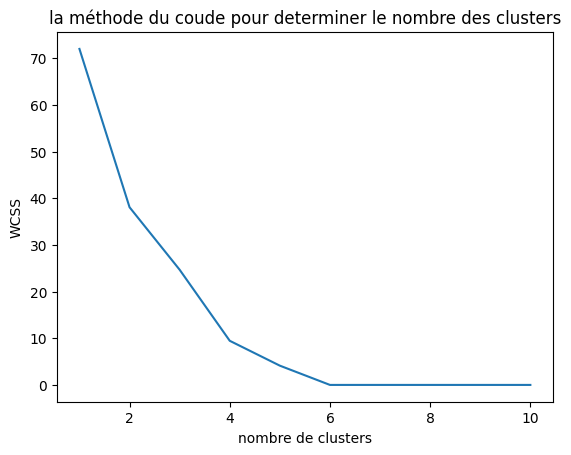

In [269]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [270]:
kmeans_etats = KMeans(n_clusters=4, init = 'k-means++') #Car cassure à nombre de clusters = 4
kmeans_etats.fit(x_scaled) #On applique l'Algorithme de Kmeans avec les data normalisées x_scaled
clusters = kmeans_etats.predict(x_scaled)
df['cluster']=clusters #Création d'une new dataframe qui permet d'ajouter le numéro du cluster en question
df

,AGE,GENDER,POSITION,SPORT1,SPORT2,SPORT3,cluster
0,20,3,0,0,5,8,1
1,30,0,5,6,0,4,3
2,23,0,6,3,3,7,0
3,26,3,5,0,4,0,2
4,56,0,5,6,0,6,3
5,35,0,6,3,5,3,0
6,20,3,0,0,5,8,1
7,30,0,5,6,0,4,3
8,23,0,6,3,3,7,0
9,26,3,5,0,4,0,2


In [271]:
for i in range(4):
    print(f'Cluster {i}')
    print(df[df.cluster == i].index.tolist())
    print()

Cluster 0
[2, 5, 8, 11]

Cluster 1
[0, 6]

Cluster 2
[3, 9]

Cluster 3
[1, 4, 7, 10]

